# Trasformata di Fourier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import scipy.ndimage as ndi
plt.rcParams['figure.figsize'] = [10, 5]

Text(0.5, 1.0, 'Shiftata con logaritmo')

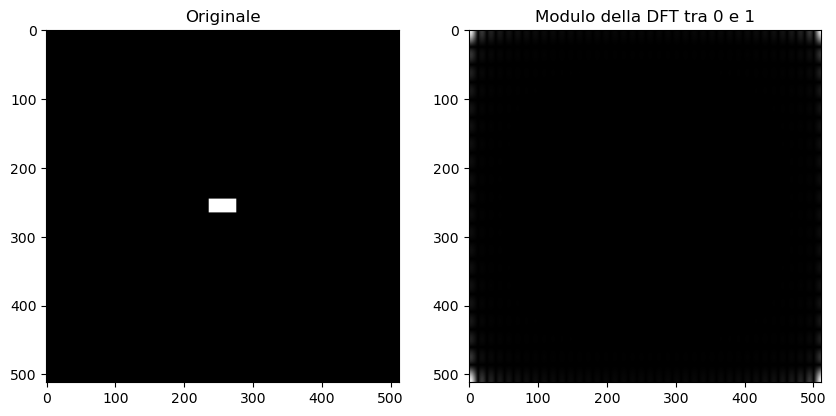

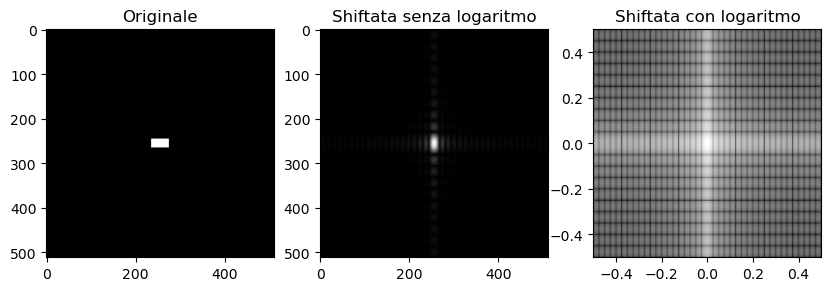

In [15]:
x = io.imread("rettangolo.jpg")
x = np.float32(x)

# Svolgo la DFT dell'immagine visualizzata tra [0 e 1]
X = np.fft.fft2(x)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Originale")

# Vado a visualizzare solo il modulo della DFT
plt.subplot(1,2,2)
plt.imshow(np.abs(X), clim=None, cmap="gray")
plt.title("Modulo della DFT tra 0 e 1")

# Però, dato che voglio visualizzare le basse frequenze al centro e le alte ai margini
# vado a traslare la fft, in modo da avere le basse frequenze al centro dell'array
X_shifted = np.fft.fftshift(X)

# Vado ad utilizzare il logaritmo per migliorarne la visualizzazione dello spettro
Y = np.log(1 + np.abs(X_shifted))

plt.figure()
plt.subplot(1,3,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Originale")


plt.subplot(1,3,2)
plt.imshow(np.abs(X_shifted), clim=None, cmap="gray")
plt.title("Shiftata senza logaritmo")

# Vado a visualizzare solo il modulo della DFT
plt.subplot(1,3,3)
plt.imshow(Y, clim=None, cmap="gray", extent=(-0.5,0.5,-0.5,+0.5))
plt.title("Shiftata con logaritmo")


Text(0.5, 1.0, 'Trasformata su più punti')

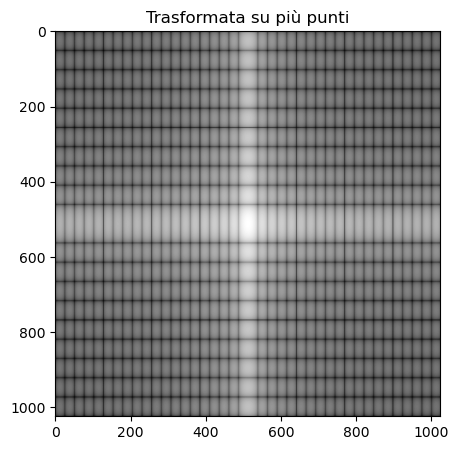

In [19]:
# Posso effettuare la DFT considerando anche un numero diverso di punti
M,N = x.shape
P = 2*M
Q = 2*N

X = np.fft.fft2(x, (P,Q))
X = np.fft.fftshift(X)
plt.figure()
plt.imshow(np.log(1+np.abs(X)), clim=None, cmap="gray")
plt.title("Trasformata su più punti")

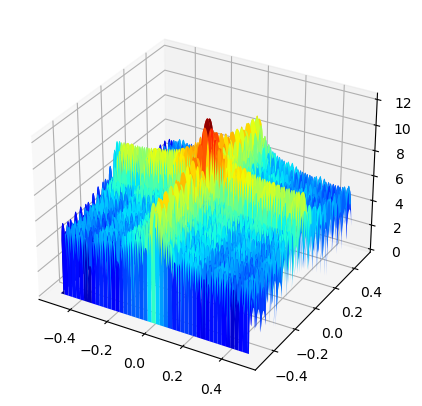

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Visualizzazione tramite grafico 3D
x = io.imread("rettangolo.jpg")
x = np.float32(x)

# Calcolo la DFT
X = np.fft.fft2(x)

# Calcolo la fft shiftata
X = np.fft.fftshift(X)

# Calcolo il modulo equalizzato con il logaritmo
Y = np.log(1 + np.abs(X))

m = np.fft.fftshift(np.fft.fftfreq(Y.shape[0]))
n = np.fft.fftshift(np.fft.fftfreq(Y.shape[1]))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax = Axes3D(plt.figure())  # ⬅️ questo crea l'asse 3D direttamente

l,k = np.meshgrid(n,m)

ax.plot_surface(l, k, Y, linewidth=0, cmap="jet")
plt.show()

### DFT per il filtraggio lineare

Implementazione del filtro di sobel in frequenza

Text(0.5, 1.0, 'Correlazione')

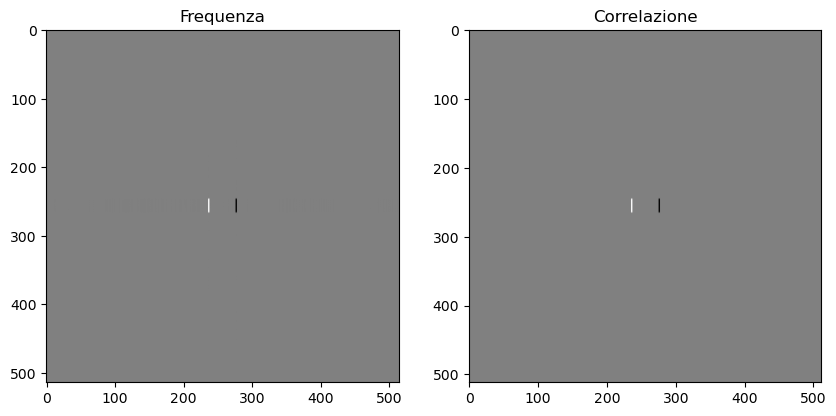

In [ ]:
x = io.imread("rettangolo.jpg")
x = np.float32(x)

h = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype=np.float64)

M,N = x.shape
A,B = h.shape

P = M+A-1
Q = N+B-1

X = np.fft.fft2(x, (P,Q))
H = np.fft.fft2(h, (P,Q))

Y = H*X

y = np.real(np.fft.ifft2(Y))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(y, clim=None, cmap="gray")
plt.title("Frequenza")

y_space = ndi.convolve(x, h, mode="reflect")

plt.subplot(1,2,2)
plt.imshow(y_space, clim=None, cmap="gray")
plt.title("Correlazione")

# Guardando i risultati notiamo che la soluzione è praticamente identica

### Filtri in Frequenza

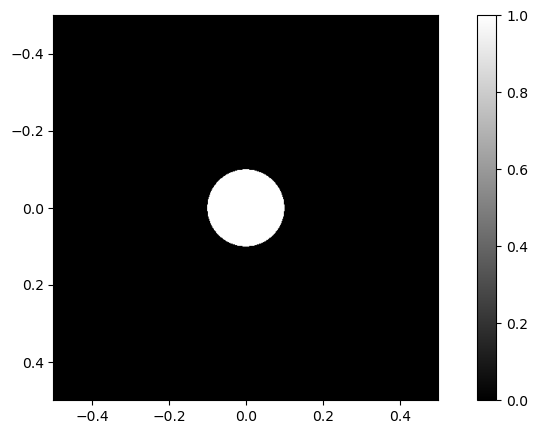

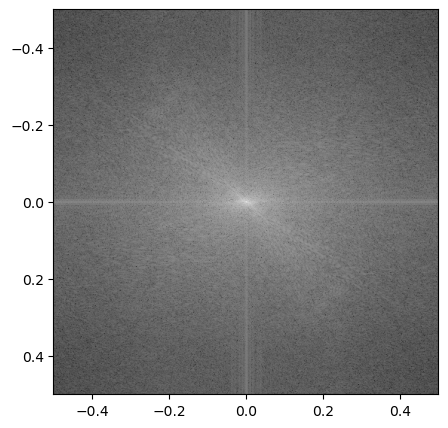

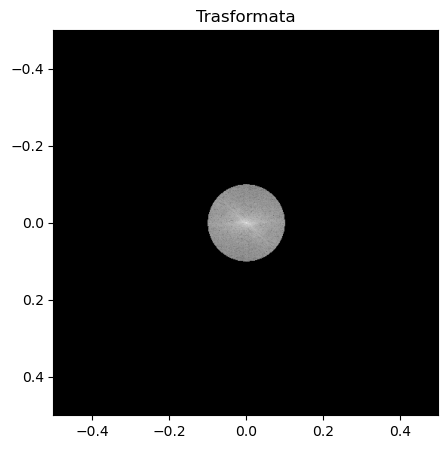

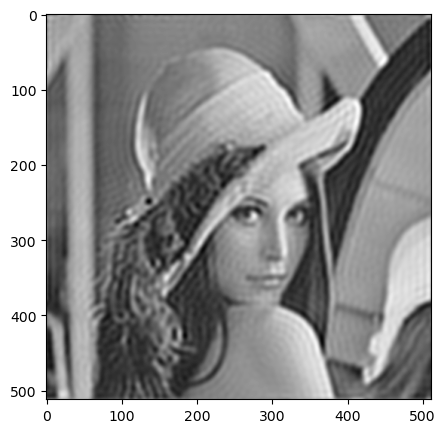

In [ ]:
x = io.imread("lena.jpg")
x = np.float32(x)

M,N = x.shape

# Vado a generare due sequenze con le frequenze basse in 0
# Facendo riferimento alla lunghezza delle dimensioni della trasformata
m = np.fft.fftshift(np.fft.fftfreq(M))
n = np.fft.fftshift(np.fft.fftfreq(N))

# Vado a generarmi due maschere bisimensinali tramite la meshgrid
# con valori piccoli al centro e valori grandi ai bordi
l,k = np.meshgrid(n,m)

# Vado a considerare le distanze in maniera circolare rispetto alle frequenze
D = np.sqrt(k**2 + l**2)

# Vado a considerare il raggio del filtro circolare desiderato
D0 = 0.1

# Genero la maschera del filtro desiderato
H = (D<=D0)

plt.figure()
plt.imshow(H, clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))
plt.colorbar()

X = np.fft.fft2(x)
X = np.fft.fftshift(X)

plt.figure()
plt.imshow(np.log(np.abs(X) + 1), clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))

Y = H*X

plt.figure()
plt.imshow(np.log(np.abs(Y)+1),clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))
plt.title("Trasformata")

Y = np.fft.ifftshift(Y)
y = np.real(np.fft.ifft2(Y))

plt.figure()
plt.imshow(y, clim=None, cmap="gray")

In [25]:
def gaussLPF(x, sigma):
    X = np.fft.fft2(x)
    X = np.fft.fftshift(X)  

    M,N = x.shape

    m = np.fft.fftshift(np.fft.fftfreq(M))
    n = np.fft.fftshift(np.fft.fftfreq(N))

    l,k = np.meshgrid(n,m)

    # Genero l'andamento circolare
    D = np.sqrt(l**2 + k**2)

    # Definisco il filtro gaussiano
    H = np.exp(-D**2/(2*(sigma**2)))

    return np.real(np.fft.ifft2(np.fft.ifftshift(X * H)))

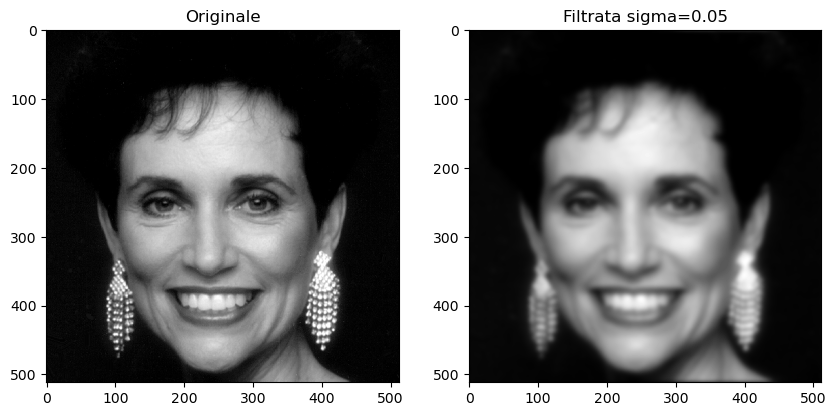

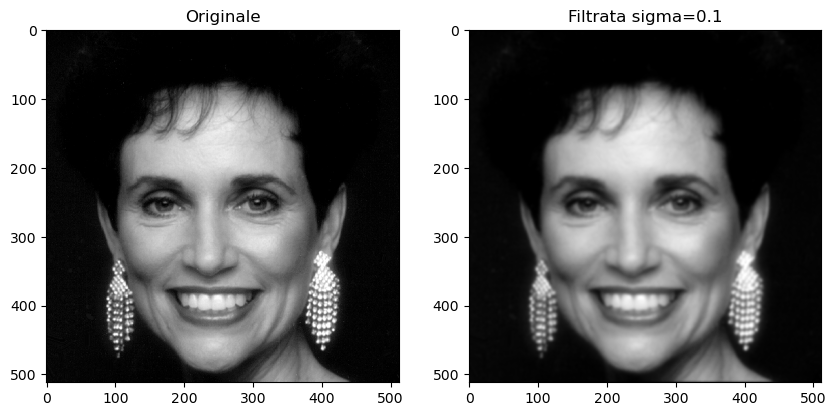

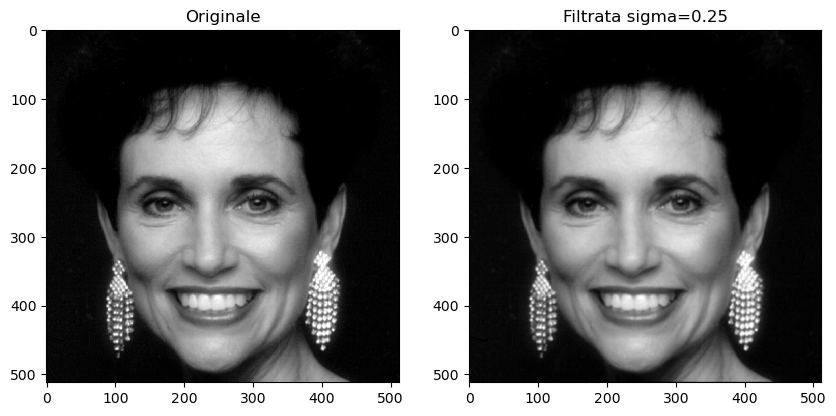

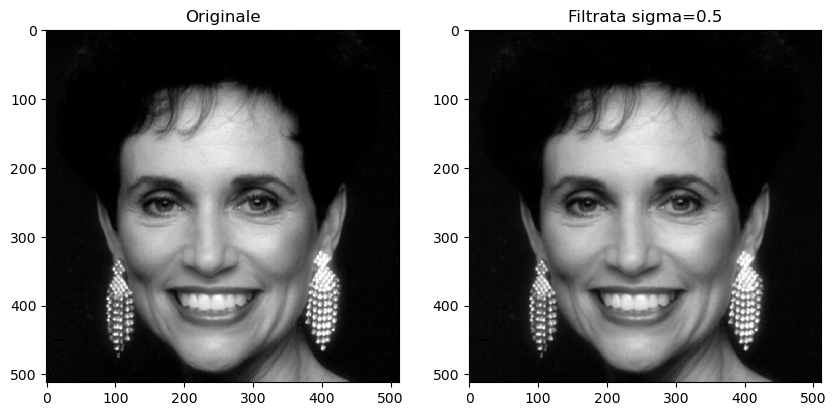

In [26]:
x = io.imread("volto.tif")
x = np.float64(x)

sig_list = [0.05, 0.1, 0.25, 0.50]

for i in sig_list:
    y = gaussLPF(x, i)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(x, clim=None, cmap="gray")
    plt.title("Originale")
    plt.subplot(1,2,2)
    plt.imshow(y, clim=None, cmap="gray")
    plt.title("Filtrata sigma=" + str(i))

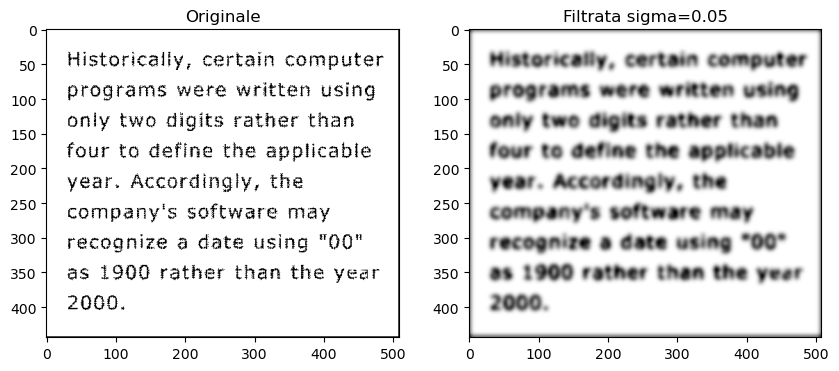

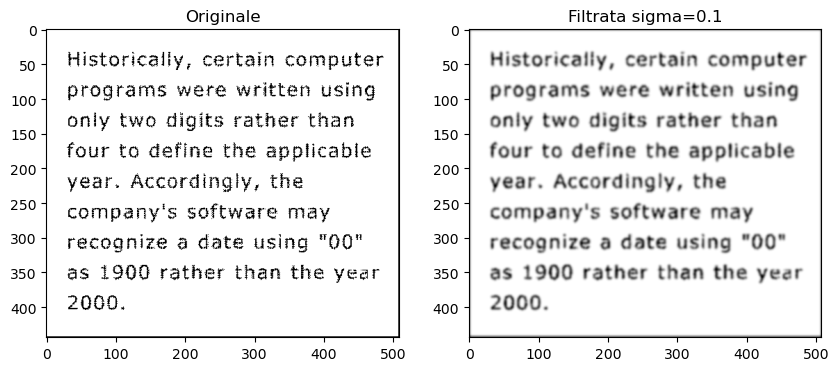

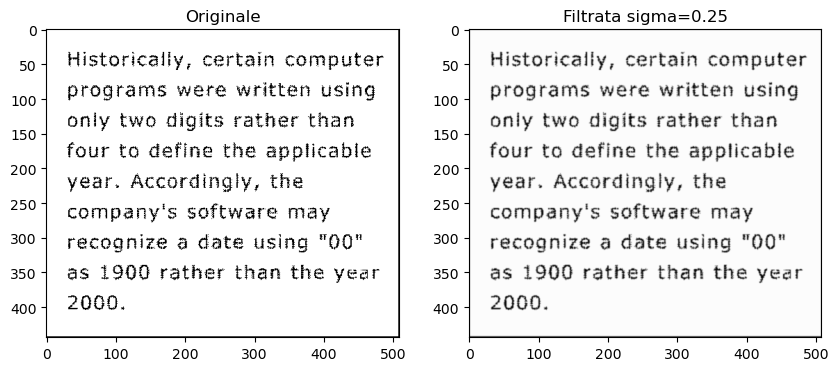

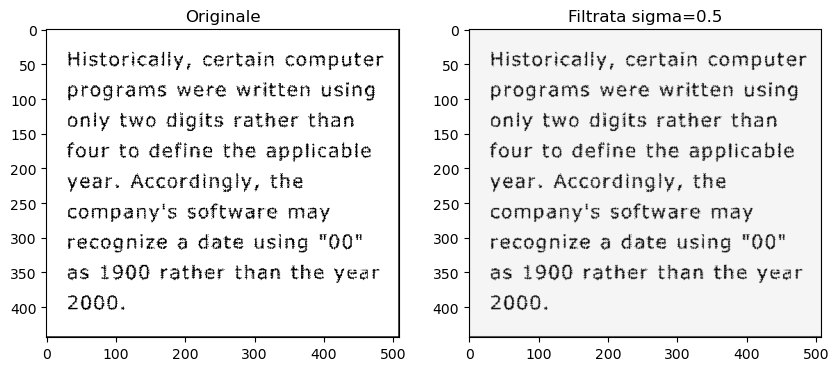

In [ ]:
x = io.imread("testo.tif")
x = np.float64(x)

# Sigma più note
sig_list = [0.05, 0.1, 0.25, 0.5]

for i in sig_list:
    y = gaussLPF(x, i)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(x, clim=None, cmap="gray")
    plt.title("Originale")
    plt.subplot(1,2,2)
    plt.imshow(y, clim=None, cmap="gray")
    plt.title("Filtrata sigma=" + str(i))

Passa-Alto ed elimina banda

In [ ]:
def passa_alto(x, dim):
    M,N = x.shape

    m = np.fft.fftshift(np.fft.fftfreq(M))
    n = np.fft.fftshift(np.fft.fftfreq(N))

    l,k = np.meshgrid(n,m)

    D = np.sqrt(l**2 + k**2)

    mask = (D >= dim)
    plt.figure()
    plt.imshow(np.abs(mask), clim=None, cmap="gray")
    X = np.fft.fftshift(np.fft.fft2(x))

    return np.real(np.fft.ifft2(np.fft.ifftshift(X*mask)))

In [33]:
def elimina_banda(x, dim1, dim2):
    M,N = x.shape

    m = np.fft.fftshift(np.fft.fftfreq(M))
    n = np.fft.fftshift(np.fft.fftfreq(N))

    l,k = np.meshgrid(n,m)

    D = np.sqrt(l**2 + k**2)

    mask1 = (D<=dim1)
    mask2 = (D >= dim2)

    mask = mask1 + mask2
    plt.figure()
    plt.imshow(np.abs(mask), clim=None, cmap="gray")
    X = np.fft.fftshift(np.fft.fft2(x))

    return np.real(np.fft.ifft2(np.fft.ifftshift(X*mask)))

Text(0.5, 1.0, 'Elimina Banda')

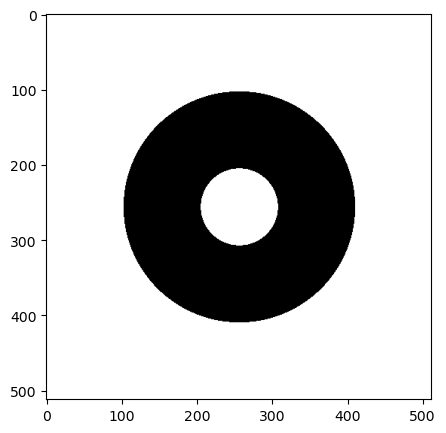

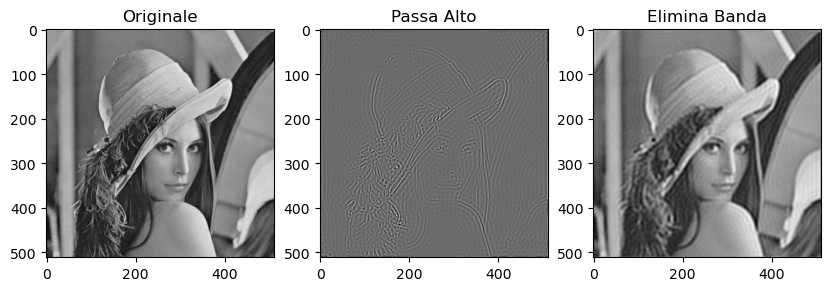

In [34]:
x = io.imread("lena.jpg")
x = np.float32(x)

y1 = passa_alto(x, 0.1)

y2 = elimina_banda(x, 0.1, 0.3)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(x, clim=None, cmap="gray")
plt.title("Originale")
plt.subplot(1,3,2)
plt.imshow(y1, clim=None, cmap="gray")
plt.title("Passa Alto")
plt.subplot(1,3,3)
plt.imshow(y2, clim=None, cmap="gray")
plt.title("Elimina Banda")